<a href="https://colab.research.google.com/github/KiplahD/Masters/blob/main/Regression_1b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Steps in ML
# 1. Data Acquisation - Getting Data, CSV, database
# 2. Data Preparation - Cleaning
# 3. Modeling/ALgorithms
# 4. Training
  # 5. Testing
  # 6. Metrics/Performance
  # 7. Feedback - Is it Ok, We retrain
# 8. Implementation.

# Step 1: Data Acquisation
import pandas
data = pandas.read_csv("https://modcom.co.ke/datasets/Advertising.csv")
data


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
# Check empties
# ML does not work with empties
# ML does not work with letters, symbols
# 2. Data Preparation - Cleaning
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
# 3a. Modeling/Algorithms
array = data.values
array
X = array[:, 0:3]  # TV, Radio, News Paper Columns, All Rows, 3 not counted, -1
Y = array[:, 3]
# X are the features/inputs/Predictors
# Y is the target/output/predicted

In [ ]:
# 3b: Training Data and Testing Data
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [ ]:
# Cross Validation of Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
models = []
models.append(('LR', LinearRegression()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('RFR', RandomForestRegressor()))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('KNN', KNeighborsRegressor()))

for name, model in models:
     kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)  # 10 Folds each fold will have 14
     cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv= kfold, scoring="r2") # do severally
     print(name, cv_results.mean()) # Get mean since there were many Folds


LR 0.8757671101319765
GBR 0.9668534198849967
RFR 0.9619075931718124
DTR 0.9122363483939623
SVR 0.7366226480205218
KNN 0.8790725161630053


In [ ]:
# 4. Training
from sklearn.linear_model import LinearRegression
model = GradientBoostingRegressor()
model.fit(X_train, Y_train)  # 70%
print('Training ... ')
# We now have a Knowledgeable Model

Training ... 


In [ ]:
# Testing
from sklearn.metrics import r2_score
# 5. Testing, Hide Y_test, Predict X_test
predictions = model.predict(X_test)
print("Model Predicts Sales ", predictions)
print("Y Test Sales ", Y_test)
print("R Squared", r2_score(Y_test, predictions))  # How close out 100 are the predictions/Y_test

Model Predicts Sales  [17.11177509 21.89584916 20.31149838  6.18264522 23.52855497 12.969581
 22.7833106   9.34468943 11.78957922 15.90246377  8.72749992  8.83027211
 12.50420757  2.5215188  10.42048147 12.11370977  4.29987204 16.57238947
 11.31385106 19.16646081 20.3347444  13.23980178 10.6955329  22.6768956
  9.95845348  8.56160215 22.80467934 12.50256299 10.11953957  4.43821117
 11.40986866 11.31385106 22.28843255  8.86464478 15.59768903 20.65114169
 12.39722638 20.19353127 12.44261317  7.27286007 10.79548005 12.64358481
 10.11585805  9.43597287 11.75264503  8.13417578 10.46473459 14.19871042
 10.25025792 12.43543084 14.59689258 12.06376764  5.99963778  4.24537503
  8.85128696 10.88775312 10.22398563 25.32574856  7.03554193 11.81126548]
Y Test Sales  [16.9 22.4 21.4  7.3 24.7 12.6 22.3  8.4 11.5 14.9  9.5  8.7 11.9  5.3
 10.3 11.7  5.5 16.6 11.3 18.9 19.7 12.5 10.9 22.2  9.3  8.1 21.7 13.4
 10.6  5.7 10.6 11.3 23.7  8.7 16.1 20.7 11.6 20.8 11.9  6.9 11.  12.8
 10.1  9.7 11.6  7.6 10

In [ ]:
# 8. Implementation
# Assume we want to Invest 30 USD for TV, 50USD for Radio, 20USD for Newspaper
# Can the untested model try to predict Sales we can make?
expense = [[90, 0, 0]]  # Adjust the figures
output =  model.predict(expense)
print("You will sell ", output, "Pair of Shoes")
# 0729 225 710


You will sell  [9.20503839] Pair of Shoes


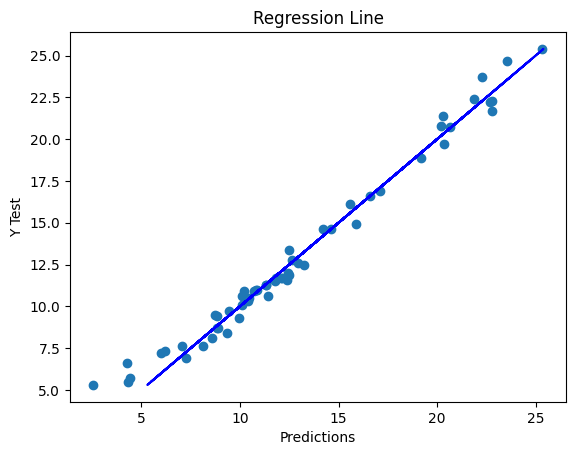

In [ ]:
# Plot Linear
import matplotlib.pyplot as plt
plt.scatter(predictions, Y_test)
plt.plot(Y_test, Y_test, color='blue')
plt.title("Regression Line")
plt.xlabel("Predictions")
plt.ylabel("Y Test")
plt.show()